<a href="https://colab.research.google.com/github/nsagita47/Pusat-Pendistribusian/blob/main/Pusat_Pendistribusian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**VARIABEL**

  - Daerah
  - Nama fasilitas
  - Alamat
  - State
  - Total pasien COVID 19 yang ditangani
  - Lokasi rumah sakit (longitude & latitude)


**PERTANYAAN**
- Dimana rumah sakit yang cocok untuk dijadikan pusat pendistribusian vaksin?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
# Load data
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Simple-project/CODING 101/COVID_19_data.csv') 
data.head()

,County Name,Facility_Name,Full_Address,State,Total,latitudes,longitudes
0,HOUSTON,SOUTHEAST ALABAMA MEDICAL CENTER,"1108 ROSS CLARK CIRCLE,DOTHAN,HOUSTON,AL",AL,2427,31.215827,-85.363433
1,MARSHALL,MARSHALL MEDICAL CENTERS,"2505 U S HIGHWAY 431 NORTH,BOAZ,MARSHALL,AL",AL,5104,34.601233,-87.123343
2,LAUDERDALE,NORTH ALABAMA MEDICAL CENTER,"1701 VETERANS DRIVE,FLORENCE,LAUDERDALE,AL",AL,2120,34.805043,-87.650814
3,JEFFERSON,ST. VINCENT'S EAST,"50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,JEFFERSO...",AL,26142,33.564772,-86.760155
4,SHELBY,SHELBY BAPTIST MEDICAL CENTER,"1000 FIRST STREET NORTH,ALABASTER,SHELBY,AL",AL,20720,33.075378,-86.519100


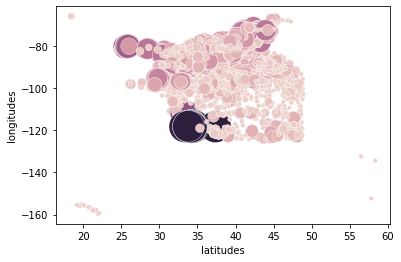

In [3]:
# Persebaran lokasi rumah sakit

sns.scatterplot(data=data, x='latitudes', y='longitudes',
                hue='Total', size='Total', sizes=(20, 1000),
                legend=False)
plt.show()




**Clustering menggunakan algoritma K-means** 

In [6]:
from sklearn.cluster import KMeans

# extract several columns in pandas
coordinates = data[['latitudes', 'longitudes']]

kmeans = KMeans(n_clusters=3, random_state=0).fit(coordinates)
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[  38.63469219 -118.55921725]
 [  37.98279043  -79.99500928]
 [  37.58172491  -95.24760065]]
[1 1 2 ... 2 2 2]


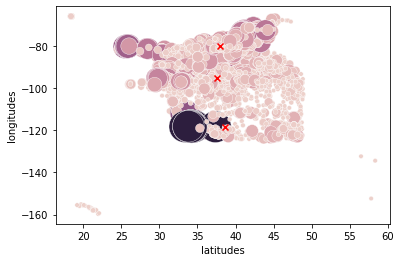

In [7]:
sns.scatterplot(data=data, x='latitudes', y='longitudes',
                hue='Total', size='Total', sizes=(20, 1000),
                legend=False)
plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1], marker='x', c='red')

plt.show()

clustering menggunakan pembobot(weight)

In [8]:
from sklearn.cluster import k_means

kmeans_weighted = k_means(coordinates, 3, sample_weight=data['Total'])
kmeans_weighted

(array([[  34.70725705, -116.78337418],
        [  33.48026338,  -89.71614814],
        [  40.8367634 ,  -75.36184948]]),
 array([1, 1, 1, ..., 1, 1, 1], dtype=int32),
 165079.5603672135)

In [9]:
kmeans_weighted[0]

array([[  34.70725705, -116.78337418],
       [  33.48026338,  -89.71614814],
       [  40.8367634 ,  -75.36184948]])

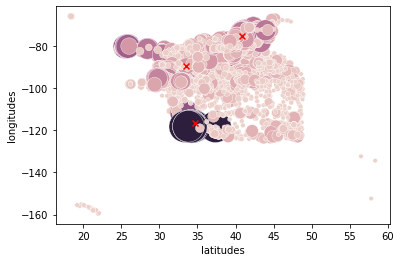

In [10]:
sns.scatterplot(data=data, x='latitudes', y='longitudes',
                hue='Total', size='Total', sizes=(20, 1000),
                legend=False)
plt.scatter(kmeans_weighted[0][:,0], 
            kmeans_weighted[0][:,1], marker='x', c='red')

plt.show()

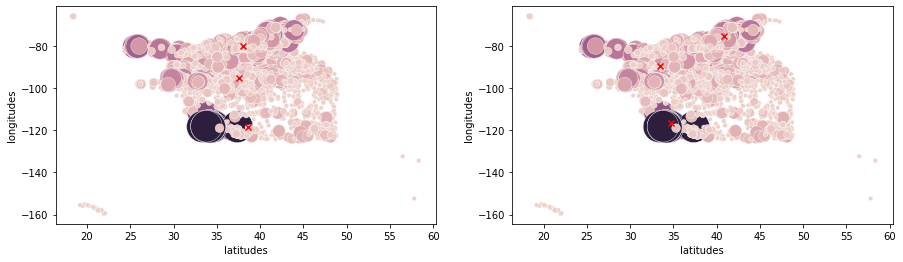

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(15)

sns.scatterplot(data=data, x='latitudes', y='longitudes',
                hue='Total', size='Total', sizes=(20, 1000),
                legend=False, ax=ax[0])
sns.scatterplot(data=data, x='latitudes', y='longitudes',
                hue='Total', size='Total', sizes=(20, 1000),
                legend=False, ax=ax[1])

ax[0].scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1], marker='x', c='red')
ax[1].scatter(kmeans_weighted[0][:,0], 
            kmeans_weighted[0][:,1], marker='x', c='red')
plt.show()

 **menentukan rumah sakit dekat dengan pusat cluster**





In [12]:
kmeans_weighted[0]

array([[  34.70725705, -116.78337418],
       [  33.48026338,  -89.71614814],
       [  40.8367634 ,  -75.36184948]])

In [14]:
def jarak(centroid, rumah_sakit):
    # cari jarak
    dist = np.linalg.norm(centroid - rumah_sakit)
    return dist

In [15]:
coordinates_ = coordinates.to_numpy()
coordinates_

array([[ 31.2158271, -85.3634326],
       [ 34.601233 , -87.123343 ],
       [ 34.8050428, -87.6508143],
       ...,
       [ 30.4515186, -97.5913466],
       [ 29.8034012, -95.4042322],
       [ 29.3748849, -98.412002 ]])

In [16]:
dist_centroid_1 = []
for rs_coor in range(len(coordinates_)):
    dist_centroid_1.append(jarak(kmeans_weighted[0][0], coordinates_[rs_coor]))

#dist_centroid_1

# index minimum
ind_min = np.argmin(dist_centroid_1)
data.iloc[ind_min]

County Name                                        SAN BERNARDINO
Facility_Name                      BEAR VALLEY COMMUNITY HOSPITAL
Full_Address     41870 GARSTIN DR,BIG BEAR LAKE,SAN BERNARDINO,CA
State                                                          CA
Total                                                       24099
latitudes                                                 34.2465
longitudes                                               -116.889
Name: 557, dtype: object

In [17]:
kmeans_weighted[0]

array([[  34.70725705, -116.78337418],
       [  33.48026338,  -89.71614814],
       [  40.8367634 ,  -75.36184948]])

In [18]:
dist_centroid_2 = []
for rs_coor in range(len(coordinates_)):
    dist_centroid_2.append(jarak(kmeans_weighted[0][1], coordinates_[rs_coor]))

#dist_centroid_1

# index minimum
ind_min = np.argmin(dist_centroid_2)
data.iloc[ind_min]

County Name                                       MONTGOMERY
Facility_Name             TYLER HOLMES MEMORIAL HOSPITAL CAH
Full_Address     409 TYLER HOLMES DRIVE,WINONA,MONTGOMERY,MS
State                                                     MS
Total                                                  41558
latitudes                                            33.4911
longitudes                                          -89.7385
Name: 2195, dtype: object